In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

dataset_path = "Image Dataset/"
images = []

for file in os.listdir(dataset_path):
    full_path = os.path.join(dataset_path, file)
    img = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Warning: Failed to load {file}")
        continue
    images.append(img)

In [19]:
def degrade_image(img, kernel_size=5, noise_variance=0.01):
    img_blur = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    noise = np.random.normal(0, 255*np.sqrt(noise_variance), img.shape)
    noisy_img = img_blur + noise
    noisy_img = np.clip(noisy_img, 0, 255)
    return noisy_img.astype(np.uint8)

In [21]:
def inverse_filter(degraded_img, kernel):
    G = np.fft.fft2(degraded_img)
    H = np.fft.fft2(kernel, s=degraded_img.shape)
    H[H==0] = 1e-6 
    F_hat = G / H
    f_restored = np.fft.ifft2(F_hat)
    return np.abs(f_restored)

In [23]:
def wiener_filter(degraded_img, kernel, K=0.01):
    G = np.fft.fft2(degraded_img)
    H = np.fft.fft2(kernel, s=degraded_img.shape)
    H_conj = np.conj(H)
    F_hat = (H_conj / (np.abs(H)**2 + K)) * G
    f_restored = np.fft.ifft2(F_hat)
    return np.abs(f_restored)

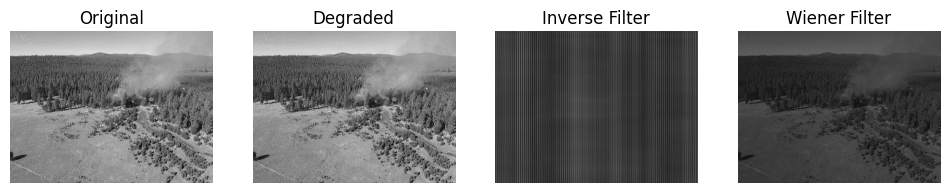

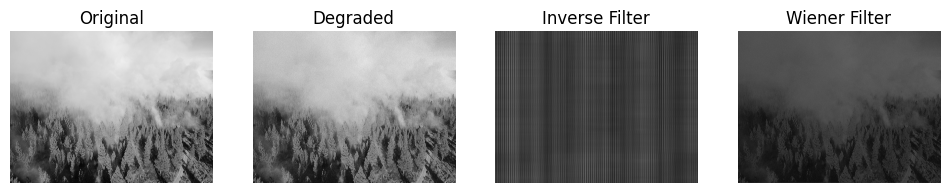

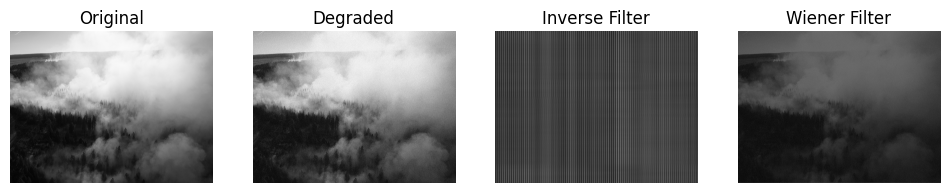

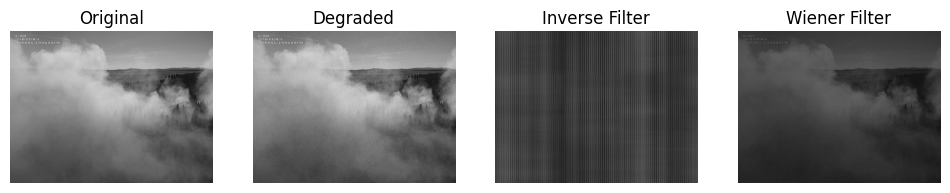

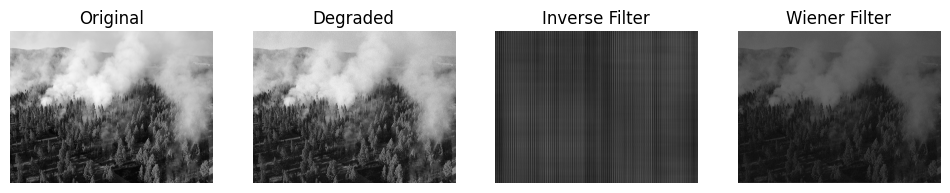

In [25]:
kernel = np.ones((5,5))/25

for img in images:
    degraded_img = degrade_image(img)
    
    inv_restored = inverse_filter(degraded_img, kernel)
    wiener_restored = wiener_filter(degraded_img, kernel, K=0.02)
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,4,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
    plt.subplot(1,4,2); plt.imshow(degraded_img, cmap='gray'); plt.title("Degraded"); plt.axis('off')
    plt.subplot(1,4,3); plt.imshow(inv_restored, cmap='gray'); plt.title("Inverse Filter"); plt.axis('off')
    plt.subplot(1,4,4); plt.imshow(wiener_restored, cmap='gray'); plt.title("Wiener Filter"); plt.axis('off')
    plt.show()